<a href="https://colab.research.google.com/github/Niharika1552/Research-Project-/blob/master/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('listings.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,...,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,...,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,https://www.airbnb.com/rooms/5022,20190912153101,2019-09-13,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,NaN,NaN,NaN,NaN,Please be considerate when staying in the apar...,NaN,NaN,https://a0.muscache.com/im/pictures/feb453bd-f...,NaN,7192,https://www.airbnb.com/users/show/7192,Laura,2009-01-29,"Miami, Florida, United States",I have been a NYer for almost 10 years. I came...,NaN,NaN,NaN,f,https:/

In [0]:
list1= list(df.dtypes)

In [0]:
list2=list(df.columns)

In [0]:
a=zip(list2,list1)

In [9]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [10]:
for col,types in a:
  print(col,types)

id int64
listing_url object
scrape_id int64
last_scraped object
name object
summary object
space object
description object
experiences_offered object
neighborhood_overview object
notes object
transit object
access object
interaction object
house_rules object
thumbnail_url float64
medium_url float64
picture_url object
xl_picture_url float64
host_id int64
host_url object
host_name object
host_since object
host_location object
host_about object
host_response_time object
host_response_rate object
host_acceptance_rate float64
host_is_superhost object
host_thumbnail_url object
host_picture_url object
host_neighbourhood object
host_listings_count float64
host_total_listings_count float64
host_verifications object
host_has_profile_pic object
host_identity_verified object
street object
neighbourhood object
neighbourhood_cleansed object
neighbourhood_group_cleansed object
city object
state object
zipcode object
market object
smart_location object
country_code object
country object
latitude float

In [0]:
required_col= ['neighbourhood_cleansed','zipcode','market','property_type','room_type','city','state','accommodates','bedrooms','beds','bed_type','price','number_of_reviews',
'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
 'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value',
 'host_listings_count','is_location_exact','availability_30','minimum_nights','latitude','longitude','bathrooms']


In [0]:
df1=df[required_col]
df1=df1[df1['price']!=0.00]


In [13]:
df1.head()

,neighbourhood_cleansed,zipcode,market,property_type,room_type,city,state,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,is_location_exact,availability_30,minimum_nights,latitude,longitude,bathrooms
0,Harlem,10027,New York,Apartment,Private room,New York,NY,2,1.0,1.0,Pull-out Sofa,$150.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,t,30,3,40.80902,-73.94190,1.0
1,Clinton Hill,11238,New York,Guest suite,Entire home/apt,Brooklyn,NY,3,1.0,4.0,Real Bed,$89.00,279,90.0,9.0,9.0,10.0,9.0,10.0,9.0,1.0,t,1,1,40.68514,-73.95976,1.0
2,East Harlem,10029,New York,Apartment,Entire home/apt,New York,NY,1,NaN,1.0,Real Bed,$80.00,9,93.0,10.0,9.0,10.0,10.0,9.0,10.0,1.0,t,0,10,40.79851,-73.94399,1.0
3,Murray Hill,10016,New York,Apartment,Entire home/apt,New York,NY,2,1.0,1.0,Real Bed,$200.00,75,89.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0,f,3,3,40.74767,-73.97500,1.0
4,Bedford-Stuyvesant,11216,New York,Apartment,Private room,Brooklyn,NY,2,1.0,1.0,Futon,$60.00,49,90.0,8.0,8.0,10.0,10.0,9.0,9.0,1.0,f,0,45,40.68688,-73.95596,NaN


In [0]:
df1['price'] = df1['price'].replace('[\$,)]','', regex=True).astype('float')

In [15]:
(df1['price']==0.00).sum()

10

In [0]:
df1['price']=df1['price'].replace(0,df1['price'].mean())

In [17]:
(df1['price']==0.00).sum()


0

In [0]:
import numpy as np
df1['log_price'] = np.log(df1['price'].values)



In [19]:
df1.head()

,neighbourhood_cleansed,zipcode,market,property_type,room_type,city,state,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,is_location_exact,availability_30,minimum_nights,latitude,longitude,bathrooms,log_price
0,Harlem,10027,New York,Apartment,Private room,New York,NY,2,1.0,1.0,Pull-out Sofa,150.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,t,30,3,40.80902,-73.94190,1.0,5.010635
1,Clinton Hill,11238,New York,Guest suite,Entire home/apt,Brooklyn,NY,3,1.0,4.0,Real Bed,89.0,279,90.0,9.0,9.0,10.0,9.0,10.0,9.0,1.0,t,1,1,40.68514,-73.95976,1.0,4.488636
2,East Harlem,10029,New York,Apartment,Entire home/apt,New York,NY,1,NaN,1.0,Real Bed,80.0,9,93.0,10.0,9.0,10.0,10.0,9.0,10.0,1.0,t,0,10,40.79851,-73.94399,1.0,4.382027
3,Murray Hill,10016,New York,Apartment,Entire home/apt,New York,NY,2,1.0,1.0,Real Bed,200.0,75,89.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0,f,3,3,40.74767,-73.97500,1.0,5.298317
4,Bedford-Stuyvesant,11216,New York,Apartment,Private room,Brooklyn,NY,2,1.0,1.0,Futon,60.0,49,90.0,8.0,8.0,10.0,10.0,9.0,9.0,1.0,f,0,45,40.68688,-73.95596,NaN,4.094345


In [0]:
df1.to_csv('airbnb.csv')

In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [0]:
df_test=df1[['zipcode','accommodates','bedrooms','beds','price','number_of_reviews',
'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
 'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value','host_listings_count','availability_30','minimum_nights','latitude','longitude','bathrooms']]

In [23]:
x=df_test
x = df_test.drop("price",1)   #Feature Matrix
y = df_test["price"]          #Target Variable
df_test.head()



,zipcode,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,availability_30,minimum_nights,latitude,longitude,bathrooms
0,10027,2,1.0,1.0,150.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30,3,40.80902,-73.94190,1.0
1,11238,3,1.0,4.0,89.0,279,90.0,9.0,9.0,10.0,9.0,10.0,9.0,1.0,1,1,40.68514,-73.95976,1.0
2,10029,1,NaN,1.0,80.0,9,93.0,10.0,9.0,10.0,10.0,9.0,10.0,1.0,0,10,40.79851,-73.94399,1.0
3,10016,2,1.0,1.0,200.0,75,89.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0,3,3,40.74767,-73.97500,1.0
4,11216,2,1.0,1.0,60.0,49,90.0,8.0,8.0,10.0,10.0,9.0,9.0,1.0,0,45,40.68688,-73.95596,NaN


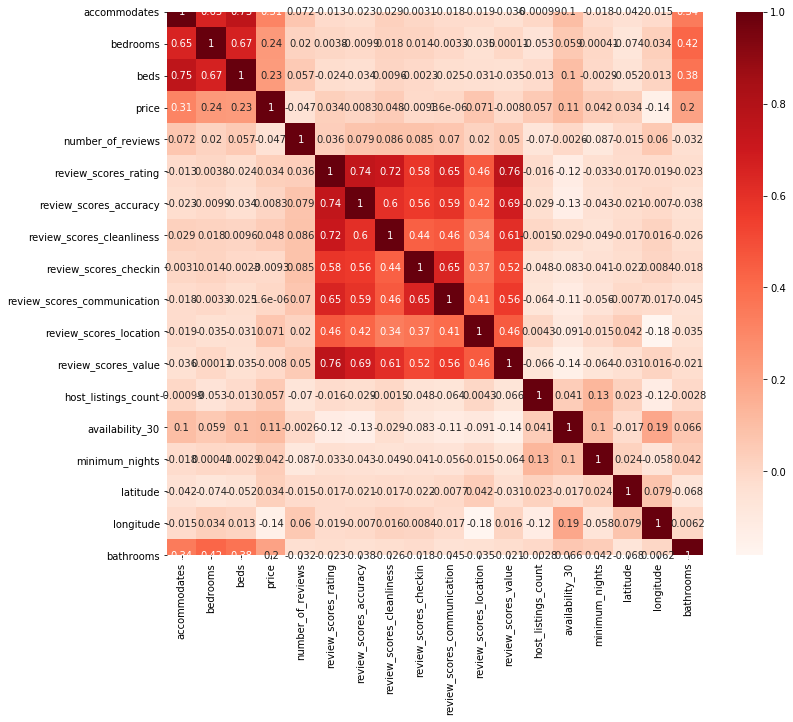

In [24]:
plt.figure(figsize=(12,10))
cor = df_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

accommodates    0.313954
bedrooms        0.235610
beds            0.230883
price           1.000000
bathrooms       0.203390
Name: price, dtype: float64

In [0]:
df1["city"]=df1["city"].str.lower()

In [27]:
df1["city"].head()

0    new york
1    brooklyn
2    new york
3    new york
4    brooklyn
Name: city, dtype: object

In [28]:
df1.property_type.unique()

array(['Apartment', 'Guest suite', 'Townhouse', 'Loft',
       'Bed and breakfast', 'Condominium', 'House', 'Boutique hotel',
       'Tiny house', 'Guesthouse', 'Cabin', 'Hostel', 'Other', 'Resort',
       'Serviced apartment', 'Boat', 'Hotel', 'Aparthotel', 'Earth house',
       'Bungalow', 'Cottage', 'Villa', 'Cave', 'Houseboat', 'Castle',
       'Nature lodge', 'Tent', 'Camper/RV', 'Bus', 'Dome house',
       'Farm stay', 'Casa particular (Cuba)', 'Island', 'Yurt', 'Barn',
       'Timeshare'], dtype=object)

# Handling Missing values

In [29]:
for i in df1.columns:
    print (i + ', Missing values count:', len(df1[i][df1[i].isnull()]))

neighbourhood_cleansed, Missing values count: 0
zipcode, Missing values count: 471
market, Missing values count: 102
property_type, Missing values count: 0
room_type, Missing values count: 0
city, Missing values count: 68
state, Missing values count: 3
accommodates, Missing values count: 0
bedrooms, Missing values count: 41
beds, Missing values count: 36
bed_type, Missing values count: 0
price, Missing values count: 0
number_of_reviews, Missing values count: 0
review_scores_rating, Missing values count: 10561
review_scores_accuracy, Missing values count: 10598
review_scores_cleanliness, Missing values count: 10583
review_scores_checkin, Missing values count: 10615
review_scores_communication, Missing values count: 10595
review_scores_location, Missing values count: 10619
review_scores_value, Missing values count: 10618
host_listings_count, Missing values count: 21
is_location_exact, Missing values count: 0
availability_30, Missing values count: 0
minimum_nights, Missing values count: 0

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48377 entries, 0 to 48376
Data columns (total 28 columns):
neighbourhood_cleansed         48377 non-null object
zipcode                        47906 non-null object
market                         48275 non-null object
property_type                  48377 non-null object
room_type                      48377 non-null object
city                           48309 non-null object
state                          48374 non-null object
accommodates                   48377 non-null int64
bedrooms                       48336 non-null float64
beds                           48341 non-null float64
bed_type                       48377 non-null object
price                          48377 non-null float64
number_of_reviews              48377 non-null int64
review_scores_rating           37816 non-null float64
review_scores_accuracy         37779 non-null float64
review_scores_cleanliness      37794 non-null float64
review_scores_checkin          37762 no

In [0]:
df1 = df1.replace('_', np.nan)

In [32]:
df1.isnull().sum()

neighbourhood_cleansed             0
zipcode                          471
market                           102
property_type                      0
room_type                          0
city                              68
state                              3
accommodates                       0
bedrooms                          41
beds                              36
bed_type                           0
price                              0
number_of_reviews                  0
review_scores_rating           10561
review_scores_accuracy         10598
review_scores_cleanliness      10583
review_scores_checkin          10615
review_scores_communication    10595
review_scores_location         10619
review_scores_value            10618
host_listings_count               21
is_location_exact                  0
availability_30                    0
minimum_nights                     0
latitude                           0
longitude                          0
bathrooms                         48
l

In [33]:
for col in df1.columns:
  print(col, type(df1[col].loc[0]))

neighbourhood_cleansed <class 'str'>
zipcode <class 'str'>
market <class 'str'>
property_type <class 'str'>
room_type <class 'str'>
city <class 'str'>
state <class 'str'>
accommodates <class 'numpy.int64'>
bedrooms <class 'numpy.float64'>
beds <class 'numpy.float64'>
bed_type <class 'str'>
price <class 'numpy.float64'>
number_of_reviews <class 'numpy.int64'>
review_scores_rating <class 'numpy.float64'>
review_scores_accuracy <class 'numpy.float64'>
review_scores_cleanliness <class 'numpy.float64'>
review_scores_checkin <class 'numpy.float64'>
review_scores_communication <class 'numpy.float64'>
review_scores_location <class 'numpy.float64'>
review_scores_value <class 'numpy.float64'>
host_listings_count <class 'numpy.float64'>
is_location_exact <class 'str'>
availability_30 <class 'numpy.int64'>
minimum_nights <class 'numpy.int64'>
latitude <class 'numpy.float64'>
longitude <class 'numpy.float64'>
bathrooms <class 'numpy.float64'>
log_price <class 'numpy.float64'>


In [34]:
df1['host_listings_count'].loc[0]

1.0

In [35]:
x=df1['price'].dtype
x

dtype('float64')

In [0]:
missing_val=[]

for col in df1.columns:
  msng_val_cnt=len(df1[col][df1[col].isnull()])
  tot_len=len(df1[col])
  dict1={'Col_Name':col,'DataType': df1[col].dtype,'percentofNull':msng_val_cnt*100.0/tot_len}
  missing_val.append(dict1)

missing_col_df = pd.DataFrame(missing_val, columns=['Col_Name','DataType','percentofNull']).sort_values( by='percentofNull',ascending=False)




In [37]:
missing_col_df

,Col_Name,DataType,percentofNull
18,review_scores_location,float64,21.950514
19,review_scores_value,float64,21.948447
16,review_scores_checkin,float64,21.942245
14,review_scores_accuracy,float64,21.907105
17,review_scores_communication,float64,21.900903
15,review_scores_cleanliness,float64,21.876098
13,review_scores_rating,float64,21.830622
1,zipcode,object,0.973603
2,market,object,0.210844
5,city,object,0.140563


In [38]:
wanted_col_df=missing_col_df[missing_col_df.percentofNull<50.0]
wanted_col_df

,Col_Name,DataType,percentofNull
18,review_scores_location,float64,21.950514
19,review_scores_value,float64,21.948447
16,review_scores_checkin,float64,21.942245
14,review_scores_accuracy,float64,21.907105
17,review_scores_communication,float64,21.900903
15,review_scores_cleanliness,float64,21.876098
13,review_scores_rating,float64,21.830622
1,zipcode,object,0.973603
2,market,object,0.210844
5,city,object,0.140563


In [39]:
for column in df1.columns.values:
    if (np.any(wanted_col_df.Col_Name.values == column) == False):
        df1.drop(column, axis=1, inplace=True)
        
df1.head(5)

,neighbourhood_cleansed,zipcode,market,property_type,room_type,city,state,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,is_location_exact,availability_30,minimum_nights,latitude,longitude,bathrooms,log_price
0,Harlem,10027,New York,Apartment,Private room,new york,NY,2,1.0,1.0,Pull-out Sofa,150.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,t,30,3,40.80902,-73.94190,1.0,5.010635
1,Clinton Hill,11238,New York,Guest suite,Entire home/apt,brooklyn,NY,3,1.0,4.0,Real Bed,89.0,279,90.0,9.0,9.0,10.0,9.0,10.0,9.0,1.0,t,1,1,40.68514,-73.95976,1.0,4.488636
2,East Harlem,10029,New York,Apartment,Entire home/apt,new york,NY,1,NaN,1.0,Real Bed,80.0,9,93.0,10.0,9.0,10.0,10.0,9.0,10.0,1.0,t,0,10,40.79851,-73.94399,1.0,4.382027
3,Murray Hill,10016,New York,Apartment,Entire home/apt,new york,NY,2,1.0,1.0,Real Bed,200.0,75,89.0,10.0,9.0,10.0,10.0,9.0,9.0,1.0,f,3,3,40.74767,-73.97500,1.0,5.298317
4,Bedford-Stuyvesant,11216,New York,Apartment,Private room,brooklyn,NY,2,1.0,1.0,Futon,60.0,49,90.0,8.0,8.0,10.0,10.0,9.0,9.0,1.0,f,0,45,40.68688,-73.95596,NaN,4.094345


In [40]:
df1.columns

Index(['neighbourhood_cleansed', 'zipcode', 'market', 'property_type',
       'room_type', 'city', 'state', 'accommodates', 'bedrooms', 'beds',
       'bed_type', 'price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'host_listings_count',
       'is_location_exact', 'availability_30', 'minimum_nights', 'latitude',
       'longitude', 'bathrooms', 'log_price'],
      dtype='object')

#Imputing Missing Values

In [41]:
wanted_col_df.dtypes == 'float64'

Col_Name         False
DataType         False
percentofNull     True
dtype: bool

In [42]:
number_colsfloat=missing_col_df[missing_col_df.DataType == 'float64' ]
number_colsint=missing_col_df[missing_col_df.DataType == 'int64' ]
number_colsfloat

,Col_Name,DataType,percentofNull
18,review_scores_location,float64,21.950514
19,review_scores_value,float64,21.948447
16,review_scores_checkin,float64,21.942245
14,review_scores_accuracy,float64,21.907105
17,review_scores_communication,float64,21.900903
15,review_scores_cleanliness,float64,21.876098
13,review_scores_rating,float64,21.830622
26,bathrooms,float64,0.099221
8,bedrooms,float64,0.084751
9,beds,float64,0.074416


In [43]:
number_colsfloat.columns

Index(['Col_Name', 'DataType', 'percentofNull'], dtype='object')

In [0]:
for col in number_colsfloat['Col_Name']:
  df1[col]=df1[col].fillna(df1[col].mean())



In [45]:
df1.isnull().sum()

neighbourhood_cleansed           0
zipcode                        471
market                         102
property_type                    0
room_type                        0
city                            68
state                            3
accommodates                     0
bedrooms                         0
beds                             0
bed_type                         0
price                            0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
host_listings_count              0
is_location_exact                0
availability_30                  0
minimum_nights                   0
latitude                         0
longitude                        0
bathrooms                        0
log_price                        0
dtype: int64

In [46]:
categorical_cols =missing_col_df[missing_col_df.DataType == 'object'].Col_Name.values
categorical_cols

array(['zipcode', 'market', 'city', 'state', 'is_location_exact',
       'neighbourhood_cleansed', 'bed_type', 'room_type', 'property_type'],
      dtype=object)

In [0]:
df1[categorical_cols] = df1[categorical_cols].apply(lambda x:x.fillna(x.value_counts().index[0]))


In [48]:
df1.isnull().sum()

neighbourhood_cleansed         0
zipcode                        0
market                         0
property_type                  0
room_type                      0
city                           0
state                          0
accommodates                   0
bedrooms                       0
beds                           0
bed_type                       0
price                          0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
host_listings_count            0
is_location_exact              0
availability_30                0
minimum_nights                 0
latitude                       0
longitude                      0
bathrooms                      0
log_price                      0
dtype: int64

In [49]:
categorical_cols

array(['zipcode', 'market', 'city', 'state', 'is_location_exact',
       'neighbourhood_cleansed', 'bed_type', 'room_type', 'property_type'],
      dtype=object)

#Label Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for col in categorical_cols:
  df1[col]=enc.fit_transform(df1[col])

In [51]:
df1[categorical_cols]

,zipcode,market,city,state,is_location_exact,neighbourhood_cleansed,bed_type,room_type,property_type
0,26,12,148,4,1,97,3,2,1
1,135,12,42,4,1,42,4,0,18
2,28,12,148,4,1,63,4,0,1
3,16,12,148,4,0,140,4,0,1
4,114,12,42,4,0,13,2,2,1
...,...,...,...,...,...,...,...,...,...
48372,130,12,42,4,1,54,4,0,1
48373,20,12,148,4,1,204,4,0,1
48374,119,12,44,4,0,28,4,2,1
48375,111,12,42,4,0,53,4,2,22


In [0]:
df2=df1.copy(deep=True)

# MODEL BUILDING

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [0]:
df2=df2.drop(['price'],axis=1)
X=df2.drop(['log_price'],axis=1)
Y=df2.log_price

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print (X_train.shape)
print(Y_train.shape)
print (X_test.shape)
print(Y_test.shape)

(38701, 26)
(38701,)
(9676, 26)
(9676,)


In [56]:
np.isfinite(X_train).all()

neighbourhood_cleansed         True
zipcode                        True
market                         True
property_type                  True
room_type                      True
city                           True
state                          True
accommodates                   True
bedrooms                       True
beds                           True
bed_type                       True
number_of_reviews              True
review_scores_rating           True
review_scores_accuracy         True
review_scores_cleanliness      True
review_scores_checkin          True
review_scores_communication    True
review_scores_location         True
review_scores_value            True
host_listings_count            True
is_location_exact              True
availability_30                True
minimum_nights                 True
latitude                       True
longitude                      True
bathrooms                      True
dtype: bool

In [57]:
np.isfinite(Y_train).all()

True

# KNN Model

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [0]:
knn = KNeighborsRegressor(algorithm='brute')

In [0]:
knn_model=knn.fit(X_train, Y_train)

In [0]:
Y_predictions = knn.predict(X_test)

#Accuracy Testing using MSE and RMSE

In [62]:
from sklearn.metrics import mean_squared_error as mse
knn_mse=mse(Y_test,Y_predictions)
knn_rmse= knn_mse ** (1/2)
print('Mean Squared Error for KNN model is :', knn_mse)
print('\n')
print('Root Mean Squared Error for KNN model is :', knn_rmse)

Mean Squared Error for KNN model is : 0.27766820714950013


Root Mean Squared Error for KNN model is : 0.5269423186170381


In [78]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_predictions)
print('R2 score for KNN model is:',score)
print('\n') 

R2 score for KNN model is: 0.4251846399047686




# Linear Regression

In [0]:
from sklearn import linear_model

In [0]:
lm = linear_model.LinearRegression()

In [0]:
lm_model = lm.fit(X_train, Y_train)
Y_lmpred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

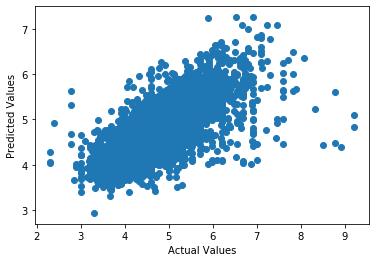

In [73]:
plt.scatter(Y_test, Y_lmpred)
plt.xlabel('Actual Values')
plt.ylabel("Predicted Values")

In [76]:
lm_mse=mse(Y_test,Y_lmpred)
lm_rmse= lm_mse ** (1/2)
print('Mean Squared Error for linear regression model is :', lm_mse)
print('\n')
print('Root Mean Squared Error for Linear regression model is :', lm_rmse)

Mean Squared Error for linear regression model is : 0.19509247716769443


Root Mean Squared Error for Linear regression model is : 0.44169274067805825


In [77]:
lm_score = r2_score(Y_test, Y_lmpred)
print('R2 score for Liner Regression is:',lm_score)
print('\n')

R2 score for Liner Regression is: 0.5961289422859989




# Ridge Regression

In [0]:
from sklearn.linear_model import Ridge

In [80]:
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,Y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [0]:
Y_ridgepred = ridgeReg.predict(X_test)

In [85]:
ridge_mse = np.mean((Y_ridgepred - Y_test)**2)
print('mse score for Ridge Regression is:',ridge_mse)
print('\n')

mse score for Ridge Regression is: 0.1954360690681684




#Lasso Regression

In [0]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,Y_train)

Y_lassopred = lassoReg.predict(X_test)

In [87]:
lasso_mse=np.mean((Y_lassopred - Y_test)**2)
print('mse score for Lasso Regression is:',lasso_mse)
print('\n')

mse score for Lasso Regression is: 0.48306907976694313




# Performance comparision



Text(0.5, 1.0, 'Performnce comparision')

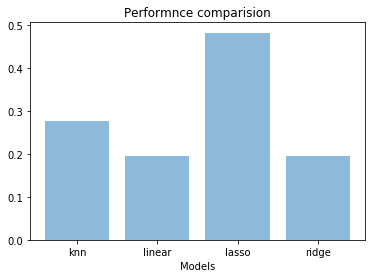

In [91]:
objects = ('knn', 'linear', 'lasso', 'ridge')
y_pos = np.arange(len(objects))
performance = [knn_mse,lm_mse,lasso_mse,ridge_mse]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Models')
plt.title('Performnce comparision')